# Final Project Submission

* Student name: Jonathan Lee
* Student pace: full time
* Scheduled project review date/time: April 27, 2pm
* Instructor name: James Irving

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

This analysis focuses on creating a multiple regression model based on housing data from King County, Washington. We will work through an exploratory data analysis to clean the data that we have to prepare it for modeling, as well as working through an iterative approach to refining our model. The goal of this analysis is to create a model which explains how different attributes affect the value of a housing property in King County, and to extract specific variables which we can use to recommend to a homeowner in King County how to increase the value of his/her home. 

# OBTAIN

The data that we will use in this analysis has been provided as a .csv file. We will inspect the data types to determine how to approach the cleansing process.

In [1]:
# Import packages to be used in notebook.
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# Load housing data
df = pd.read_csv('data/kc_house_data.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


None

# SCRUB

The data looks clean for the most part, but there are null values in the columns labeled 'waterfront', 'view' and 'yr_renovated' which will be addressed in this section. We also need to make sure to address the two columns that have been stored as object data types labeled 'date' and 'sqft_basement' in addition to checking for duplicated entries. 

## Checking for duplicates

In [3]:
df[df['id'].duplicated(keep=False)]

# Duplicates in id have different dates, and can be considered as resold properties.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [4]:
df[df.duplicated(keep=False)]

# There are no duplicated entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
# Drop id and date columns since they are not controllable attributes
# that would affect the value of the property
df.drop(['id','date'], axis=1, inplace=True)

## Checking null value counts

In [6]:
# Check number of NaN cells in dataframe
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Check waterfront column's value counts
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

We will assume that homes with a missing value for 'waterfront' are not located on a waterfront

In [8]:
# Replace Nan cells with 0.0
df['waterfront'].fillna(0.0, inplace=True)

In [9]:
# Confirm that fillna method worked properly
df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [10]:
#Check yr_renovated value counts
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

Similar to the 'waterfront', we will assume that homes with a missing value for 'yr_renovated' have not undergone renovation.

In [11]:
# Replace NaN cells with 0.0
df['yr_renovated'].fillna(0.0, inplace=True)

In [12]:
# Confirm that fillna method worked properly
df['yr_renovated'].value_counts(dropna=False)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Due to the ambiguous definition of the 'view' column, we will drop it to avoid including any variables in our regression model that we cannot explain.

In [13]:
# Remove view due to ambiguous definition
df.drop('view', axis=1, inplace=True)

In [14]:
#Confirm that all NaN cells have been addressed
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Converting Data Types
Great, no more null values to address. Now we need to check why 'sqft_basement' is being stored as an object data type. We will go ahead and remove the missing entries since the count is not large and convert the data type to float or int.

In [15]:
# Check for non-numberical entries in sqft_basement
df['sqft_basement'].value_counts().sort_index()

0.0       12826
10.0          2
100.0        42
1000.0      148
1008.0        1
          ...  
960.0        65
970.0        44
980.0        57
990.0        52
?           454
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
# Remove entries where sqft_basement is '?'
df = df[df['sqft_basement'] != '?']

In [17]:
# Convert sqft_basement from object to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

## Feature Engineering
Because those properties that have not been renovated contain a value of 0.0 under their 'yr_renovated' column, this will skew the rest of the data where the other entries that have been renovated will contain a year number. We will engineer a binary feature that indicates whether or not the property has undergone any renovation in order to avoid this skew issue.

In [18]:
# Define function to create column with value 1 if renovated, 0 if not renovated.
def renov_bool(row):
    if row['yr_renovated'] > 0:
        val = 1
    else:
        val = 0
    return val

In [19]:
# Apply function to create renovated column
df['renovated'] = df.apply(renov_bool, axis=1)
df.drop('yr_renovated', axis=1, inplace=True)

In [20]:
# Verify that we have successfully removed null values and fixed data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   condition      21143 non-null  int64  
 8   grade          21143 non-null  int64  
 9   sqft_above     21143 non-null  int64  
 10  sqft_basement  21143 non-null  float64
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  lat            21143 non-null  float64
 14  long           21143 non-null  float64
 15  sqft_living15  21143 non-null  int64  
 16  sqft_lot15     21143 non-null  int64  
 17  renovated      21143 non-null  int64  
dtypes: flo

## Checking for Correlation and Multicollinearity

We will move on to check for how correlated each column is with our target variable 'price' as well as check for multicollinearity

In [21]:
# Create correlation matrix from dataframe
price_corr = df.corr()
price_corr.round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.04,0.67,0.61,0.33,0.05,-0.05,0.31,0.02,0.59,0.08,0.12
bedrooms,0.31,1.00,0.51,0.58,0.03,0.18,0.00,0.03,0.36,0.48,0.30,0.16,-0.15,-0.01,0.13,0.39,0.03,0.02
bathrooms,0.53,0.51,1.00,0.76,0.09,0.50,0.06,-0.13,0.67,0.69,0.28,0.51,-0.20,0.02,0.22,0.57,0.09,0.05
sqft_living,0.70,0.58,0.76,1.00,0.17,0.35,0.11,-0.06,0.76,0.88,0.43,0.32,-0.20,0.05,0.24,0.76,0.18,0.05
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.18,0.02,0.05,-0.13,-0.09,0.23,0.14,0.72,0.00
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,-0.26,0.46,0.52,-0.25,0.49,-0.06,0.05,0.13,0.28,-0.01,0.00
waterfront,0.27,0.00,0.06,0.11,0.02,0.02,1.00,0.02,0.08,0.07,0.08,-0.02,0.03,-0.01,-0.04,0.09,0.03,0.07
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,1.00,-0.15,-0.16,0.17,-0.36,0.00,-0.02,-0.11,-0.09,-0.00,-0.06
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.08,-0.15,1.00,0.76,0.17,0.45,-0.19,0.11,0.20,0.71,0.12,0.02
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.07,-0.16,0.76,1.00,-0.05,0.43,-0.26,-0.00,0.34,0.73,0.20,0.02


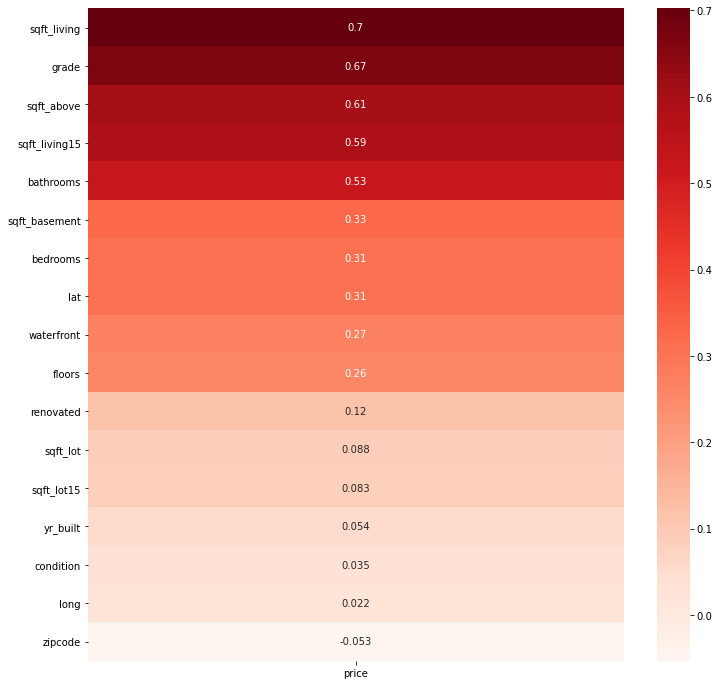

In [22]:
# Correlation heatmap customization guide was utilized to create the following visualizations:
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(price_corr[['price']].drop('price').sort_values(by='price', ascending=False), annot=True, 
            ax=ax, cmap='Reds');

In [23]:
# Drop price to only show correlation between independent variables
corr = df.drop('price', axis=1).corr().round(2)

In [24]:
# Create mask for upper triangle of matrix
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

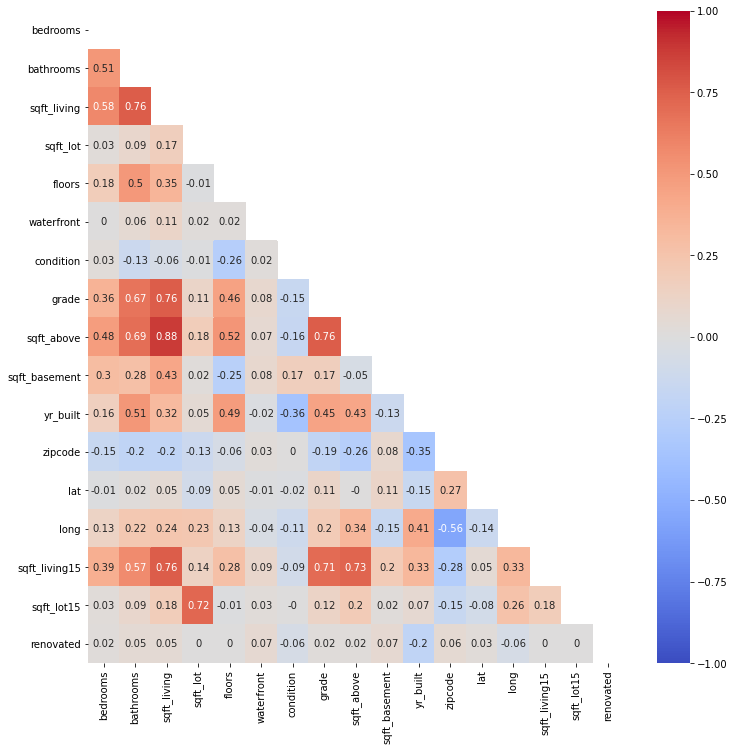

In [25]:
#Create heatmap correlation matrix
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1,\
            mask=mask);

From the correlation heatmap, we can see that other than 'sqft_living', we do not have any variables that are high enough to remove prior to running our baseline model. We will go ahead and remove 'sqft_living' to address the issue of multicollinearity in our dataset.

In [26]:
# Remove sqft_living to get address multicollinearity
df.drop('sqft_living', axis=1, inplace=True)

corr = df.drop('price', axis=1).corr().round(2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

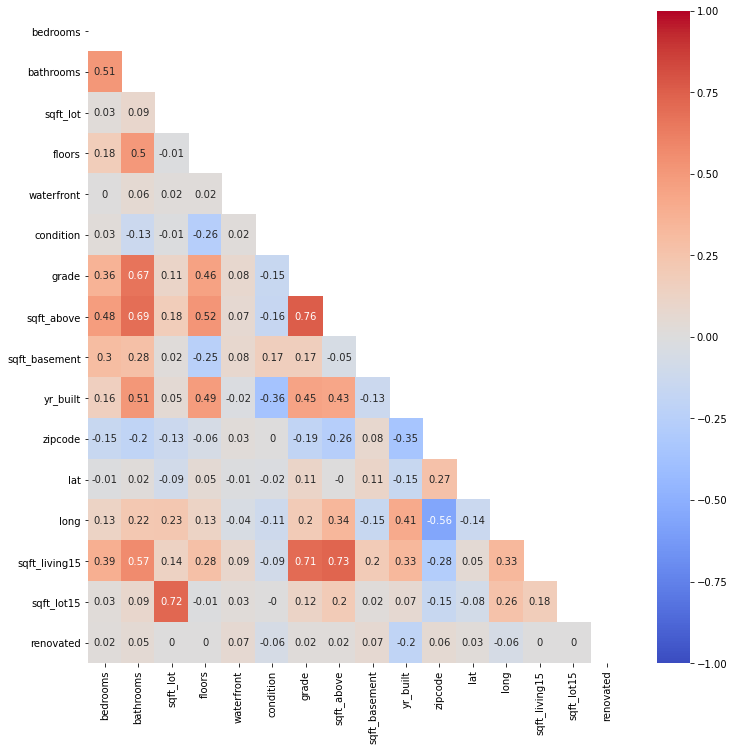

In [27]:
# Check heatmap correlation matrix after removing column
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, mask=mask);

# EXPLORE

In this section, we will explore the distributions as well as addressing the issue of outliers in each column. We will also be checking to see how much of a linear relationship each variable has with our target variable 'price'.

In [28]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.114300e+04,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000,21143.000000
mean,5.405107e+05,3.372558,2.116079,1.508714e+04,1.493591,0.006716,3.409923,7.658279,1789.069006,291.851724,1971.023223,98077.868893,47.560274,-122.213876,1987.27139,12738.941967,0.034196
std,3.680751e+05,0.924917,0.768531,4.120920e+04,0.539249,0.081679,0.650498,1.174253,828.409769,442.498337,29.321938,53.535756,0.138591,0.140597,685.67034,27169.273663,0.181736
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,1.069550e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000,0.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000,1.000000


## Checking for Normality, Outliers, and Linearity

There appear to be some outliers, as in the case of bedrooms where the max number is 33. Although this might be an error in data collection, we will leave the outliers be for now to see how they affect the skew of our data and how our baseline model turns out with what has been provided.

We will proceed to visualize how our data is distributed as well as the linearity of each variable against the price variable.

In [30]:
# Create function to plot histogram and boxplot to indicate normality and outliers
# and scatterplot to show linearity with the target variable
def plot_distribution_linearity(df, col=None, verbose=False,boxplot=True):
    """This function was written by James Irving during study group.
    Original function has been modified to include regression plot to
    illustrate linear relationship with 'price' column.
    
    Plots a histogram + KDE and a boxplot of the column.
    Also prints statistics for skew, kurtosis, and normaltest. 

    Args:
        df_ (DataFrame): DataFrame containing column to plot
        col (str): Name of the column to plot.
        verbose (bool, optional): If true show figure and print stats. Defaults to True.
        boxplot (bool, optional): If true, return subplots with boxplot. Defaults to True.

    Returns:
        fig : Matplotlib Figure
        ax : Matplotlib Axis
    """
    
    # df = df_.copy()

    if col is None:
        data = df.copy()
        name = data.name
    else:
        data = df[col].copy()
        name = col

    ## Calc mean and mean skew and curtosis
    median = data.median().round(2)
    mean = data.mean().round(2)
    skew_val = round(stats.skew(data, bias=False),2)
    kurt_val = round(stats.kurtosis(data,bias=False),2)
    
    
    ## Plot distribution 
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[:, 1])

    sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
    sns.kdeplot(data,color='green',label='KDE',ax=ax0)
    ax0.set(ylabel='Density',title=name.title())
    ax0.set_title(F"Distribution of {name.title()}")
    ax0.axvline(median,label=f'median={median:,}',color='black')
    ax0.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax0.legend()

    ## Plot Boxplot
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Box Plot of {name.title()}")

    # Plot Scatterplot to illustrate linearity
    sns.regplot(data=df, x=col, y='price', line_kws={"color": "red"}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name.title()}")

    ## Tweak Layout & Display
    fig.tight_layout()
    
    ## Delete boxplot if unwanted
    if boxplot == False:
        fig.delaxes(ax[1])
    
    if verbose:
        plt.show()

        print('[i] Distribution Stats:')
        print(f"\tSkew = {skew_val}")
        print(f"\tKurtosis = {kurt_val}")
        print(f"\tN = {len(data):,}")


        ## Test for normality
        result = stats.normaltest(data)
        print('\n',result)
        if result[1]<.05:
            print('\t- p<.05: The distribution is NOT normally distributed.')
        elif result[1] >=.05:
            print('\t- p>=.05: The distribution IS normally distributed')
    
    return fig, ax

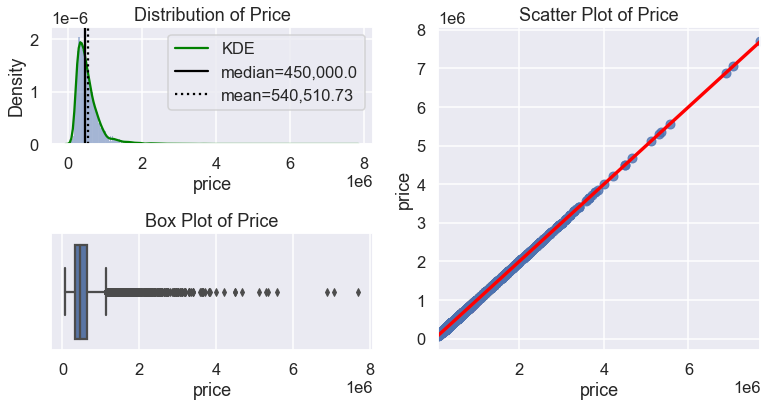

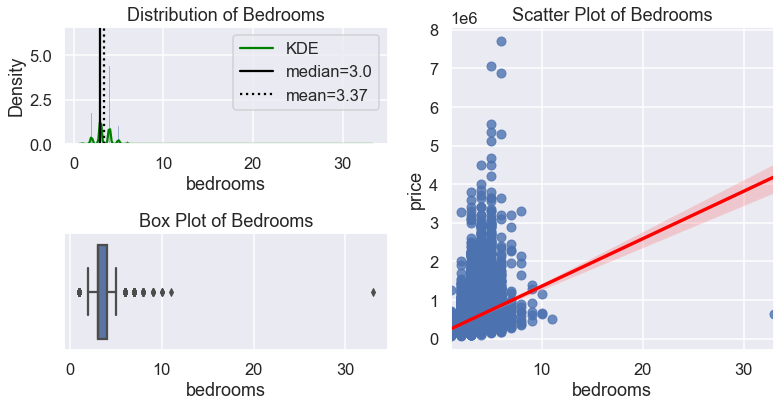

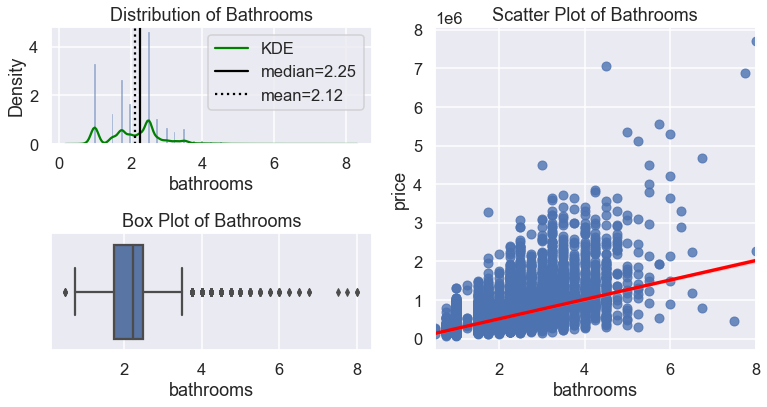

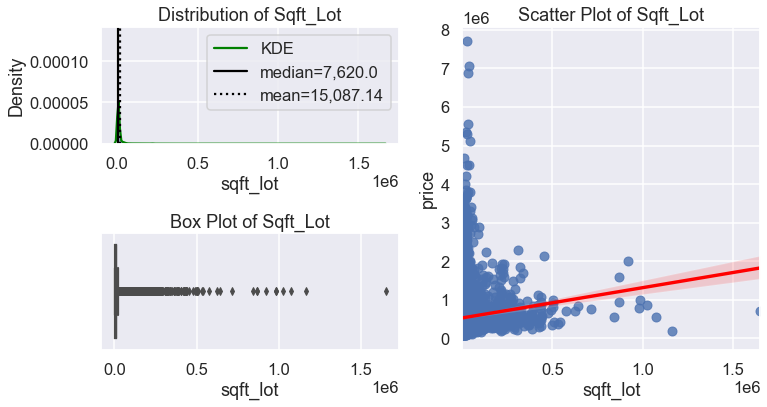

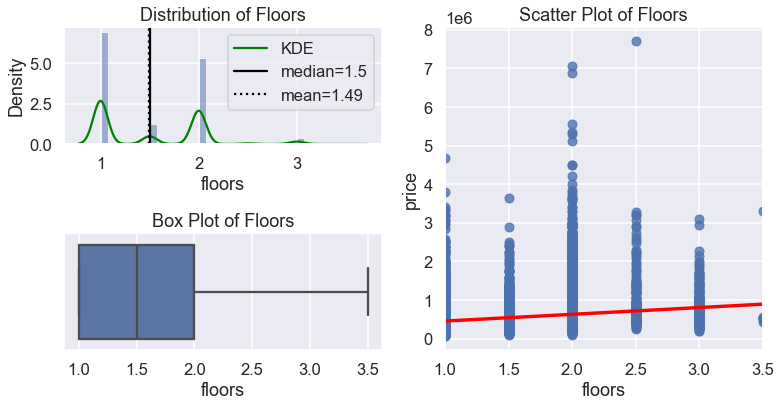

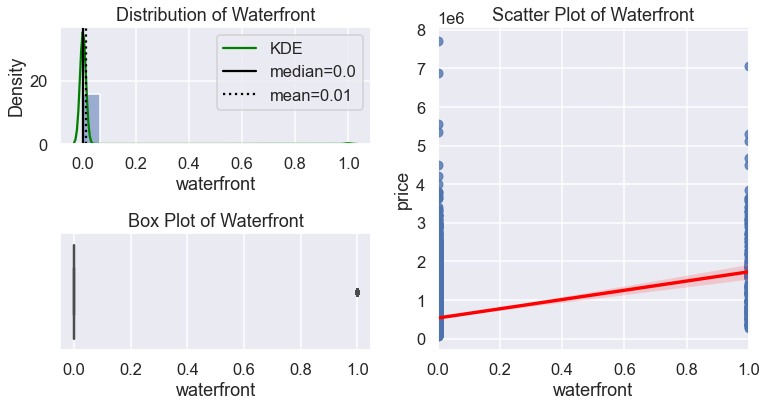

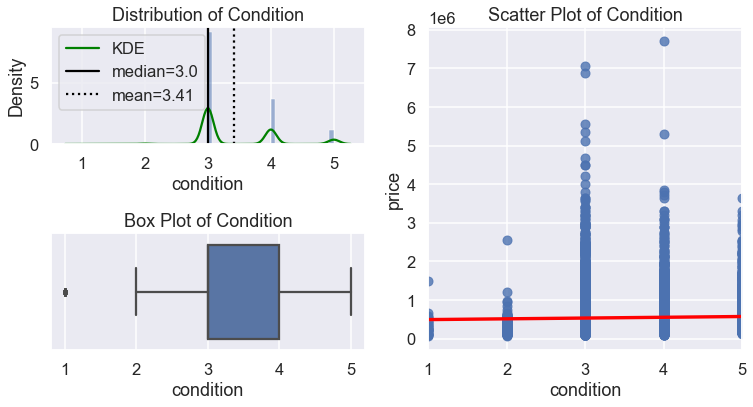

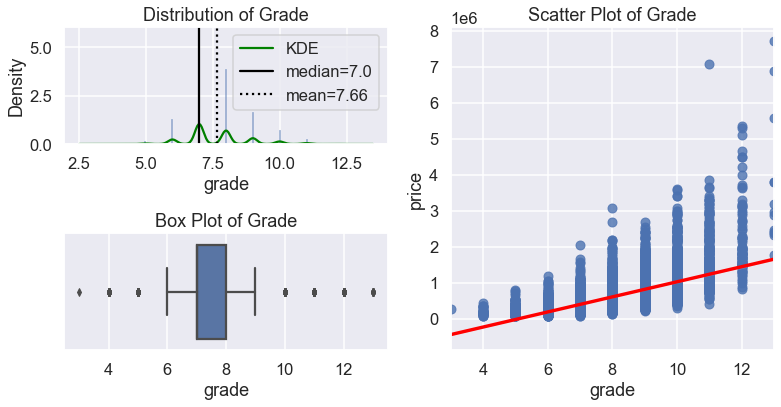

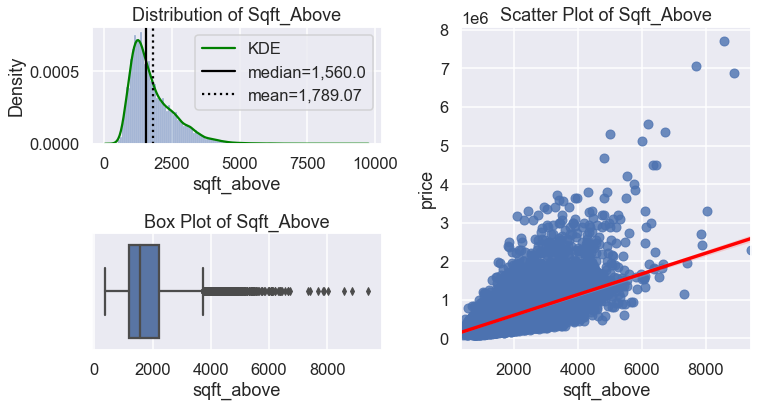

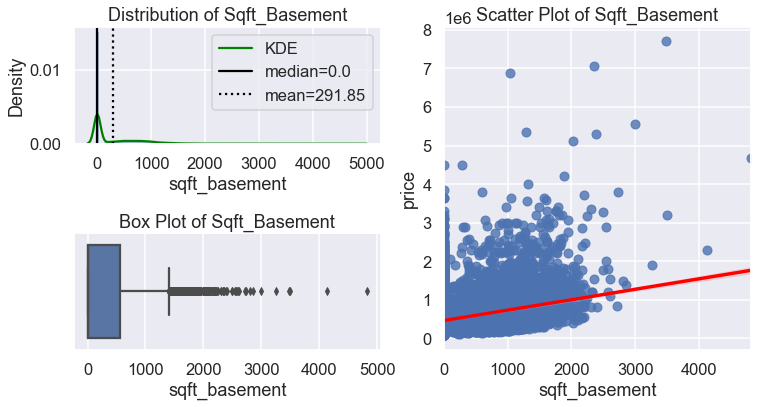

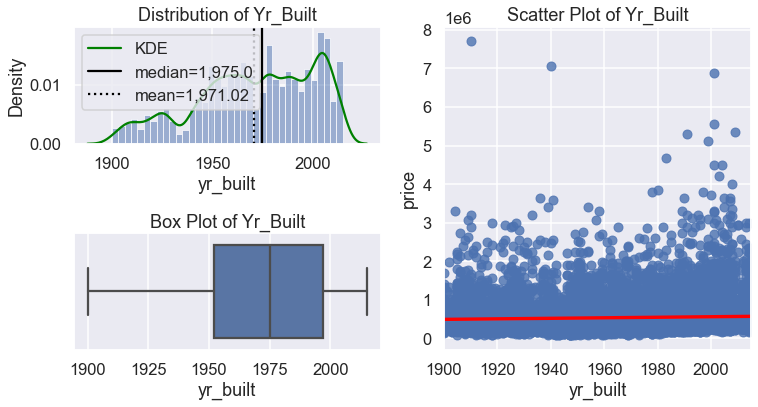

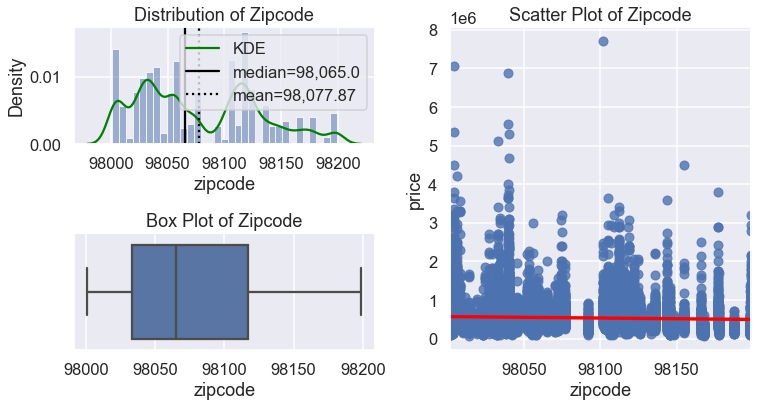

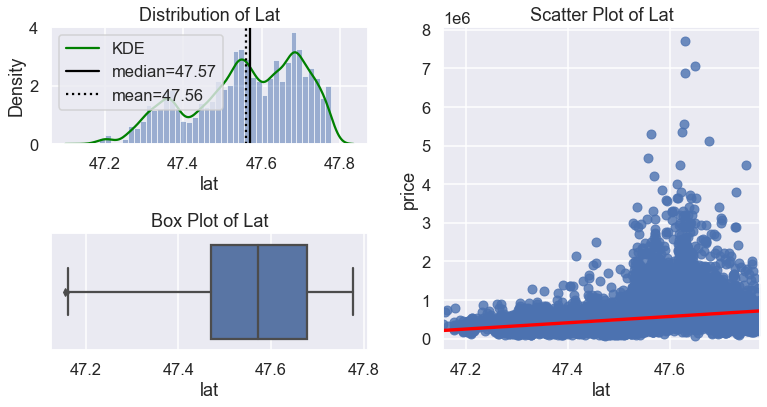

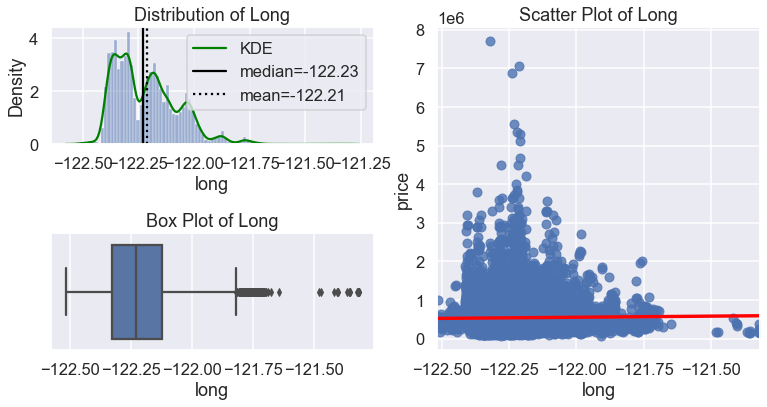

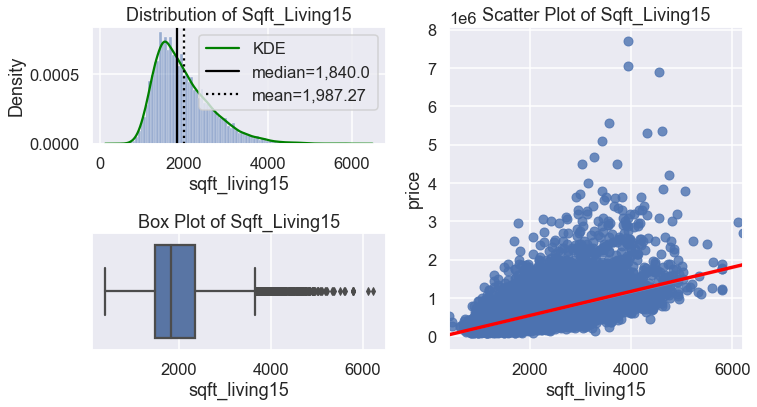

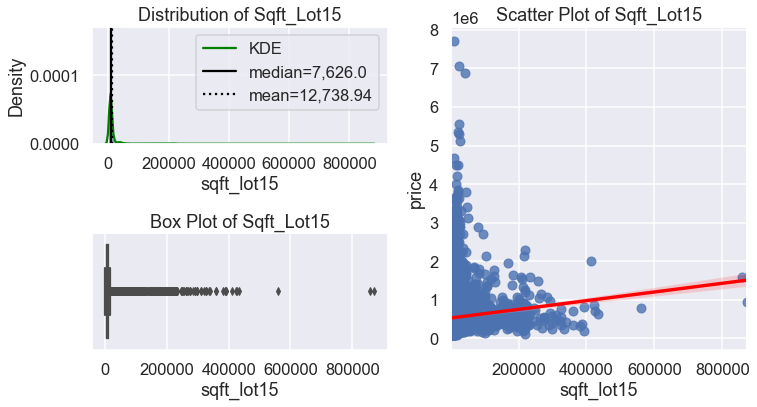

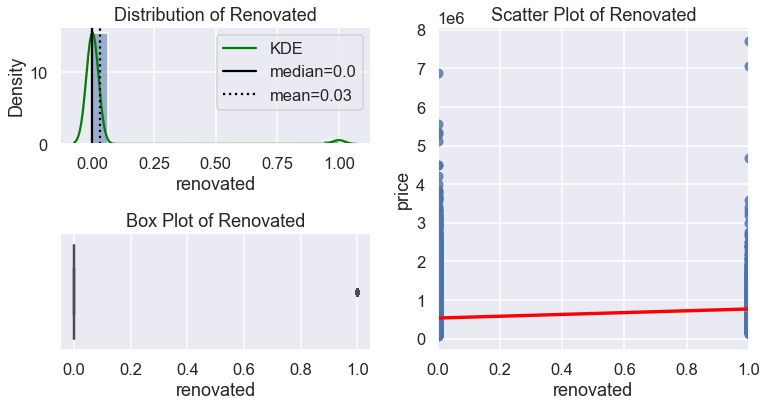

In [31]:
# Create plot for all columns
for col in df:
    plot_distribution_linearity(df=df, col=col);

In [32]:
# Remove columns where there is weak linear relationship with price
df.drop(['condition', 'yr_built', 'renovated', 'sqft_lot15'], axis=1, inplace=True)

## One Hot Encoding

We can see that there are some categorical variables in our dataset, but other than the 'zipcode' column, the other variables are ordinal.

We will proceed to use One Hot Encoding prior to running our multiple regression model including the zipcode data.

In [33]:
# One Hot Encode zipcodes column
encoder = OneHotEncoder(drop='first',sparse=False)
encoder.fit(df[['zipcode']])

ohe_vars = encoder.transform(df[['zipcode']])
ohe_vars

encoder.get_feature_names(['zipcode'])

df_ohe = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(['zipcode']),\
                      index=df.index)
df_ohe

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Join One Hot Encoded dataframe with original dataframe and drop
# original zipcodes column
df_model = pd.concat([df.drop('zipcode',axis=1),df_ohe],axis=1)
df_model

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,5650,1.0,0.0,7,1180,0.0,47.5112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,7242,2.0,0.0,7,2170,400.0,47.7210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,10000,1.0,0.0,6,770,0.0,47.7379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,5000,1.0,0.0,7,1050,910.0,47.5208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,8080,1.0,0.0,8,1680,0.0,47.6168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,8,1530,0.0,47.6993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,5813,2.0,0.0,8,2310,0.0,47.5107,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1350,2.0,0.0,7,1020,0.0,47.5944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,2388,2.0,0.0,8,1600,0.0,47.5345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL

Finally, we have prepared our data enough to be able to run an initial iteration of our multiple regression model! As we create each model, we will include a QQ plot to address the normality of residuals as well as plotting price vs residuals in order to check for homoscedasticity of residuals.

## Creating a Baseline Model

In [35]:
# Create function to simultaneously run model and plot for normality
# and homoscedasticity of residuals.
def model_combined(df):
    ## Create a string representing the right side of the ~ in our formula
    features = ' + '.join(df.drop('price',axis=1).columns)
    
    ## Create the final formula and create the model
    f  = "price~"+features
    
    # Model regression
    model = smf.ols(f, df).fit()
    display(model.summary())
    
    # Create QQ plot
    fig, ax = plt.subplots(ncols=2,figsize=(14,6))
    sm.graphics.qqplot(model.resid,dist=stats.norm,fit=True,line='45',\
                       ax=ax[0])
    ax[0].set_title('QQ Plot')
    
    # Create homoscedasticity plot
    resids = model.resid
    sns.scatterplot(x=model.predict(df.drop('price',axis=1), transform=True),\
                    y=model.resid, ax=ax[1])
    ax[1].axhline(0, color='r')
    ax[1].set_title('Homoscedasticity of Residuals')
    ax[1].set_xlabel('Predicted Price')
    ax[1].set_ylabel('Residuals')
    
    
    return model, fig, ax

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1006.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:29:30   Log-Likelihood:            -2.8434e+05
No. Observations:               21143   AIC:                         5.689e+05
Df Residuals:                   21062   BIC:                         5.695e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.693e+07   6.51e+06     -4.140      0.000   -3.97e+07   -1.42e+07
bedrooms      -2.781e+04   1614.774    -17.224      0.000    -3.1e+04   -2.46e+04
bathrooms       1.29e+04   2621.916      4.920      0.000    7760.985     1.8e+04
sqft_lot          0.2365      0.031      7.642      0.000       0.176       0.297
floors        -6.476e+04   3127.358    -20.708      0.000   -7.09e+04   -5.86e+04
waterfront     8.813e+05   1.46e+04     60.424      0.000    8.53e+05     9.1e+05
grade          5.264e+04   1832.891     28.717      0.000     4.9e+04    5.62e+04
sqft_above      219.3557      3.115     70.429      0.000     213.251     225.460
sqft_basement   157.4838      3.686     42.720      0.000     150.258     164.709
lat            1.207e+05   6.69e+04      1.804      0.071   -1.04e+04    2.52e+05
long          -1.703e+05   4.83e+04     -3.523      0.000   -2.65e+05   -7.55e+04
sqft_living15    27.4453      2.985      9.193      0.000      21.594      33.297
zipcode_98002  5.715e+04   1.52e+04      3.760      0.000    2.74e+04    8.69e+04
zipcode_98003 -1.635e+04   1.37e+04     -1.195      0.232   -4.32e+04    1.05e+04
zipcode_98004  7.574e+05   2.47e+04     30.600      0.000    7.09e+05    8.06e+05
zipcode_98005  2.806e+05   2.64e+04     10.614      0.000    2.29e+05    3.32e+05
zipcode_98006  2.751e+05   2.16e+04     12.709      0.000    2.33e+05    3.18e+05
zipcode_98007  2.345e+05   2.73e+04      8.586      0.000    1.81e+05    2.88e+05
zipcode_98008  2.612e+05    2.6e+04     10.058      0.000     2.1e+05    3.12e+05
zipcode_98010  1.146e+05   2.33e+04      4.917      0.000    6.89e+04     1.6e+05
zipcode_98011  6.726e+04   3.38e+04      1.991      0.047    1034.942    1.33e+05
zipcode_98014  1.215e+05   3.71e+04      3.277      0.001    4.88e+04    1.94e+05
zipcode_98019  7.459e+04   3.67e+04      2.034      0.042    2728.027    1.46e+05
zipcode_98022  8.621e+04   2.03e+04      4.253      0.000    4.65e+04    1.26e+05
zipcode_98023 -5.151e+04   1.26e+04     -4.093      0.000   -7.62e+04   -2.68e+04
zipcode_98024  1.806e+05   3.27e+04      5.524      0.000    1.17e+05    2.45e+05
zipcode_98027  1.718e+05   2.23e+04      7.706      0.000    1.28e+05    2.16e+05
zipcode_98028  6.885e+04   3.28e+04      2.097      0.036    4507.689    1.33e+05
zipcode_98029  2.212e+05   2.55e+04      8.683      0.000    1.71e+05    2.71e+05
zipcode_98030  6440.1953    1.5e+04      0.428      0.669   -2.31e+04    3.59e+04
zipcode_98031  1.687e+04   1.57e+04      1.076      0.282   -1.39e+04    4.76e+04
zipcode_98032  9181.2935   1.81e+04      0.507      0.612   -2.63e+04    4.47e+04
zipcode_98033   3.43e+05   2.81e+04     12.190      0.000    2.88e+05    3.98e+05
zipcode_98034  1.685e+05   3.02e+04      5.583      0.000    1.09e+05    2.28e+05
zipcode_98038  5.275e+04   1.69e+04      3.115   

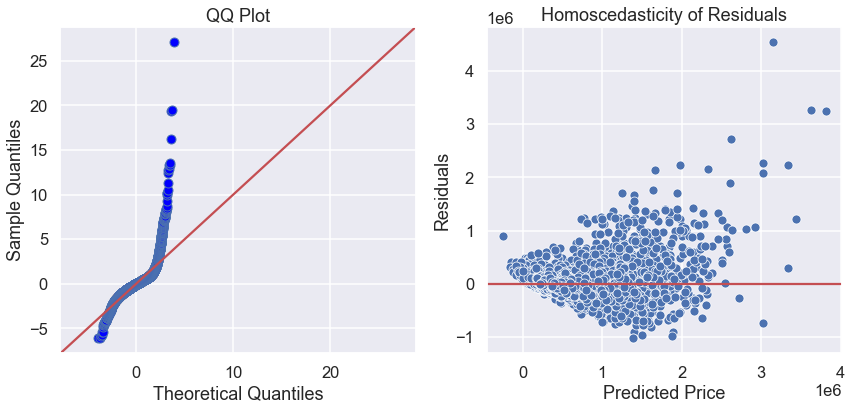

In [36]:
# Run regression on cleaned dataframe
model_combined(df_model);

## Removing Outliers to Fulfill Assumptions of Multiple Regressions

We have successfully run our baseline model, and our R2 value isn't too bad! However, we can see from the QQ plot and homoscedasticity plot that we are not fulfilling the assumptions of multiple regression. 

We will try to address this issue by removing outliers that lie 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile.

In [37]:
# Create function to remove outliers.
def find_outliers_IQR(data):
    """This function was written by James Irving during study group.
    
    Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In the 'Explore' section, we saw that we have many outliers several columns. We will proceed to remove outliers from those columns that have extreme outliers, based on our boxplot visualizations.

In [38]:
# Create list of columns to remove outliers from
cols_outlier = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', \
                'sqft_basement', 'sqft_living15']
df_outliers = df_model.copy()

# Remove outliers for specified columns
for col in cols_outlier:
    df_outliers = df_outliers[~find_outliers_IQR(df_outliers[col])]

In [39]:
df_outliers

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,5650,1.0,0.0,7,1180,0.0,47.5112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,7242,2.0,0.0,7,2170,400.0,47.7210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,10000,1.0,0.0,6,770,0.0,47.7379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,5000,1.0,0.0,7,1050,910.0,47.5208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,8080,1.0,0.0,8,1680,0.0,47.6168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,8,1530,0.0,47.6993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,5813,2.0,0.0,8,2310,0.0,47.5107,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1350,2.0,0.0,7,1020,0.0,47.5944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,2388,2.0,0.0,8,1600,0.0,47.5345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     848.1
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:29:31   Log-Likelihood:            -2.0856e+05
No. Observations:               16358   AIC:                         4.173e+05
Df Residuals:                   16277   BIC:                         4.179e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.098e+06   4.45e+06     -0.471      0.638   -1.08e+07    6.63e+06
bedrooms      -2850.0552   1115.288     -2.555      0.011   -5036.141    -663.969
bathrooms      6959.9481   1611.666      4.318      0.000    3800.906    1.01e+04
sqft_lot          2.8752      0.276     10.421      0.000       2.334       3.416
floors         -2.75e+04   1951.375    -14.092      0.000   -3.13e+04   -2.37e+04
waterfront     3.382e+05   1.87e+04     18.087      0.000    3.02e+05    3.75e+05
grade          3.475e+04   1149.769     30.221      0.000    3.25e+04     3.7e+04
sqft_above      130.3372      2.348     55.502      0.000     125.734     134.940
sqft_basement    90.9682      2.638     34.480      0.000      85.797      96.140
lat           -4.173e+04   4.19e+04     -0.995      0.320   -1.24e+05    4.05e+04
long          -3.107e+04   3.37e+04     -0.922      0.356   -9.71e+04     3.5e+04
sqft_living15    34.8750      2.108     16.545      0.000      30.743      39.007
zipcode_98002  3.279e+04   8193.908      4.001      0.000    1.67e+04    4.88e+04
zipcode_98003  5708.5590   7433.852      0.768      0.443   -8862.607    2.03e+04
zipcode_98004  5.463e+05   1.58e+04     34.605      0.000    5.15e+05    5.77e+05
zipcode_98005  3.521e+05   1.62e+04     21.728      0.000     3.2e+05    3.84e+05
zipcode_98006  2.942e+05   1.34e+04     21.879      0.000    2.68e+05    3.21e+05
zipcode_98007  2.793e+05   1.64e+04     17.022      0.000    2.47e+05    3.11e+05
zipcode_98008  2.716e+05   1.59e+04     17.079      0.000     2.4e+05    3.03e+05
zipcode_98010  1.052e+05   1.61e+04      6.535      0.000    7.37e+04    1.37e+05
zipcode_98011  1.656e+05   2.06e+04      8.024      0.000    1.25e+05    2.06e+05
zipcode_98014   1.37e+05   2.61e+04      5.255      0.000    8.59e+04    1.88e+05
zipcode_98019   1.15e+05   2.29e+04      5.023      0.000    7.01e+04     1.6e+05
zipcode_98022  3.168e+04   1.33e+04      2.382      0.017    5610.093    5.78e+04
zipcode_98023 -1.431e+04   7174.382     -1.995      0.046   -2.84e+04    -247.789
zipcode_98024  1.662e+05   2.45e+04      6.796      0.000    1.18e+05    2.14e+05
zipcode_98027  2.528e+05   1.46e+04     17.348      0.000    2.24e+05    2.81e+05
zipcode_98028  1.532e+05   2.01e+04      7.620      0.000    1.14e+05    1.93e+05
zipcode_98029  2.584e+05    1.6e+04     16.180      0.000    2.27e+05     2.9e+05
zipcode_98030  1.107e+04   8322.238      1.330      0.184   -5244.964    2.74e+04
zipcode_98031  2.545e+04   8842.824      2.878      0.004    8117.202    4.28e+04
zipcode_98032  1.577e+04   9774.747      1.614      0.107   -3384.816    3.49e+04
zipcode_98033   3.44e+05   1.74e+04     19.733      0.000     3.1e+05    3.78e+05
zipcode_98034  2.116e+05   1.86e+04     11.375      0.000    1.75e+05    2.48e+05
zipcode_98038  4.761e+04   1.05e+04      4.525   

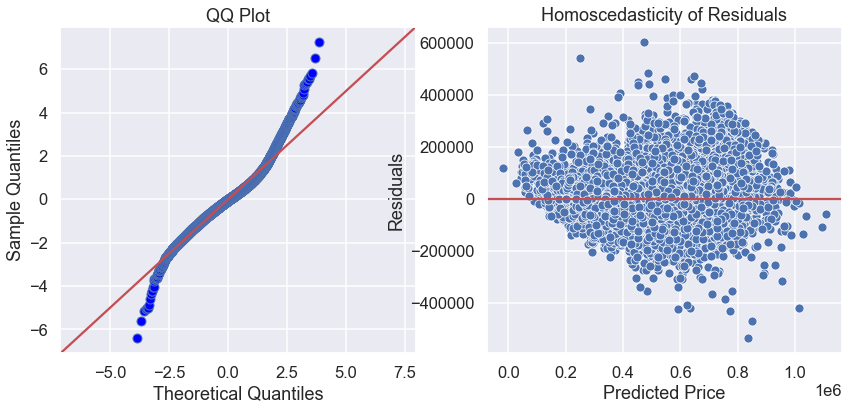

In [40]:
# Run regression model on our dataset where outliers are removed.
model_combined(df_outliers);

Great! We can see that although they are not quite perfect, our QQ plot and homoscedasticity plot look much better. We can see that our R2 value has gone up a bit as well.

Now we want to move on to addressing the nonsignificant P-values in our model. Since a nonsignificant P-value is indicates that our model would be no different than when the respective coefficient is 0, we will go ahead and remove those variables from our model.

In [41]:
# Create new dataframe after removing outliers
df_pvalues = df_outliers.drop(['lat', 'long'], axis=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     869.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:29:31   Log-Likelihood:            -2.0856e+05
No. Observations:               16358   AIC:                         4.173e+05
Df Residuals:                   16279   BIC:                         4.179e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.73e+05   8978.380    -30.405      0.000   -2.91e+05   -2.55e+05
bedrooms      -2849.0091   1115.274     -2.555      0.011   -5035.068    -662.950
bathrooms      6955.4124   1611.577      4.316      0.000    3796.545    1.01e+04
sqft_lot          2.8718      0.276     10.409      0.000       2.331       3.413
floors        -2.748e+04   1951.119    -14.082      0.000   -3.13e+04   -2.37e+04
waterfront     3.385e+05   1.87e+04     18.106      0.000    3.02e+05    3.75e+05
grade          3.476e+04   1149.100     30.250      0.000    3.25e+04     3.7e+04
sqft_above      130.3278      2.348     55.500      0.000     125.725     134.931
sqft_basement    90.9779      2.638     34.486      0.000      85.807      96.149
sqft_living15    34.8325      2.107     16.528      0.000      30.702      38.963
zipcode_98002  3.111e+04   7975.317      3.901      0.000    1.55e+04    4.67e+04
zipcode_98003  6760.4627   7310.504      0.925      0.355   -7568.927    2.11e+04
zipcode_98004  5.316e+05   9106.136     58.382      0.000    5.14e+05    5.49e+05
zipcode_98005  3.368e+05   9855.624     34.175      0.000    3.17e+05    3.56e+05
zipcode_98006  2.802e+05   7147.222     39.199      0.000    2.66e+05    2.94e+05
zipcode_98007  2.628e+05   9275.845     28.334      0.000    2.45e+05    2.81e+05
zipcode_98008  2.541e+05   7420.469     34.249      0.000     2.4e+05    2.69e+05
zipcode_98010  9.676e+04   1.36e+04      7.131      0.000    7.02e+04    1.23e+05
zipcode_98011   1.45e+05   8316.130     17.434      0.000    1.29e+05    1.61e+05
zipcode_98014   1.08e+05   1.39e+04      7.790      0.000    8.08e+04    1.35e+05
zipcode_98019  8.778e+04   8780.990      9.997      0.000    7.06e+04    1.05e+05
zipcode_98022  2.768e+04   8721.026      3.174      0.002    1.06e+04    4.48e+04
zipcode_98023 -1.125e+04   6426.804     -1.751      0.080   -2.39e+04    1342.806
zipcode_98024  1.443e+05   1.78e+04      8.107      0.000    1.09e+05    1.79e+05
zipcode_98027  2.366e+05   7721.041     30.640      0.000    2.21e+05    2.52e+05
zipcode_98028  1.339e+05   7433.627     18.012      0.000    1.19e+05    1.48e+05
zipcode_98029  2.397e+05   7261.295     33.009      0.000    2.25e+05    2.54e+05
zipcode_98030  6138.2120   7420.942      0.827      0.408   -8407.648    2.07e+04
zipcode_98031  1.904e+04   7352.505      2.590      0.010    4630.856    3.35e+04
zipcode_98032  1.343e+04   9420.742      1.426      0.154   -5032.423    3.19e+04
zipcode_98033  3.259e+05   6946.511     46.914      0.000    3.12e+05     3.4e+05
zipcode_98034  1.924e+05   6329.075     30.403      0.000     1.8e+05    2.05e+05
zipcode_98038  3.808e+04   6374.554      5.974      0.000    2.56e+04    5.06e+04
zipcode_98039  6.533e+05   3.45e+04     18.938      0.000    5.86e+05    7.21e+05
zipcode_98040  4.401e+05   9275.468     47.452   

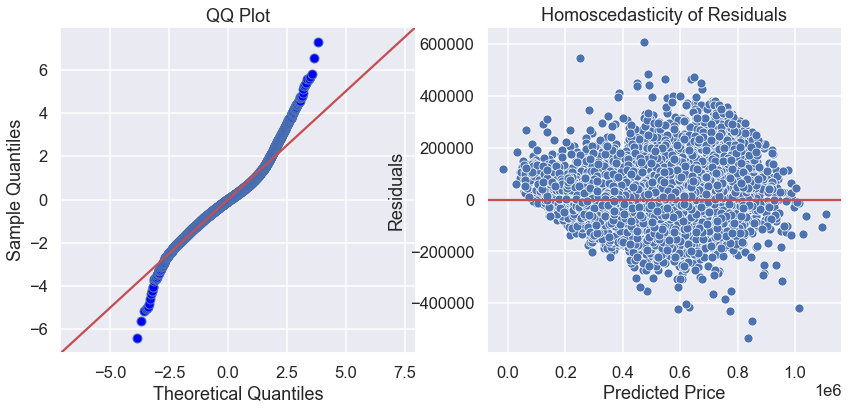

In [42]:
# Run regression on dataframe after removing non-significant variables
model_unscaled, fig_unscaled, ax_unscaled = model_combined(df_pvalues)

# iNTERPRET

Now that we have our final model with outliers removed and only significant P-values included, all that's left in our analysis is to scale our model coefficients to determine which coefficients have the largest effect on the variability of housing price. Since there are multiple coefficients for zipcode, we will examine which of the other variables have high coefficients. 

We should also note that zipcode, as well as some other variables are ones that we cannot control, and therefore will not be appropriate variables to provide recommendations for changing. However, we will still include those variables as part of our model, as long as they have a high enough coefficient to indicate that they are valid predictors for the value of a house.

## Scaling the Dataset

In [43]:
# Create copy of final dataset to scale
df_unscaled = df_pvalues.copy()

In [44]:
# Create list of columns except for zipcode
numeric_cols = [col for col in df_unscaled.columns if \
                col.startswith('zipcode')==False]
numeric_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15']

In [45]:
# Create scaler object
scaler = StandardScaler()
scaler

StandardScaler()

In [46]:
# Scale our dataset used to form our final model
df_scaled = df_unscaled.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,...,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00,16358.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.12,0.06,0.15,0.11,0.11,0.10,0.12,0.08,0.12,0.12
min,-1.95,-1.62,-2.24,-1.93,-0.85,-0.04,-3.83,-1.96,-0.67,-2.71,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.77,-0.32,-0.72,-0.69,-0.85,-0.04,-0.44,-0.75,-0.67,-0.74,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.18,-0.32,0.04,0.00,-0.85,-0.04,-0.44,-0.24,-0.67,-0.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.59,0.98,0.80,0.58,0.98,-0.04,0.69,0.59,0.68,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3.55,2.28,3.08,3.28,3.74,27.89,4.08,2.91,2.91,2.80,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Creating a Scaled Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     869.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:29:33   Log-Likelihood:                -9777.5
No. Observations:               16358   AIC:                         1.971e+04
Df Residuals:                   16279   BIC:                         2.032e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0046      0.027    -37.858      0.000      -1.057      -0.953
bedrooms         -0.0116      0.005     -2.555      0.011      -0.020      -0.003
bathrooms         0.0242      0.006      4.316      0.000       0.013       0.035
sqft_lot          0.0514      0.005     10.409      0.000       0.042       0.061
floors           -0.0790      0.006    -14.082      0.000      -0.090      -0.068
waterfront        0.0640      0.004     18.106      0.000       0.057       0.071
grade             0.1623      0.005     30.250      0.000       0.152       0.173
sqft_above        0.3970      0.007     55.500      0.000       0.383       0.411
sqft_basement     0.1700      0.005     34.486      0.000       0.160       0.180
sqft_living15     0.0908      0.005     16.528      0.000       0.080       0.102
zipcode_98002     0.1642      0.042      3.901      0.000       0.082       0.247
zipcode_98003     0.0357      0.039      0.925      0.355      -0.040       0.111
zipcode_98004     2.8061      0.048     58.382      0.000       2.712       2.900
zipcode_98005     1.7778      0.052     34.175      0.000       1.676       1.880
zipcode_98006     1.4788      0.038     39.199      0.000       1.405       1.553
zipcode_98007     1.3872      0.049     28.334      0.000       1.291       1.483
zipcode_98008     1.3414      0.039     34.249      0.000       1.265       1.418
zipcode_98010     0.5107      0.072      7.131      0.000       0.370       0.651
zipcode_98011     0.7653      0.044     17.434      0.000       0.679       0.851
zipcode_98014     0.5701      0.073      7.790      0.000       0.427       0.714
zipcode_98019     0.4633      0.046      9.997      0.000       0.372       0.554
zipcode_98022     0.1461      0.046      3.174      0.002       0.056       0.236
zipcode_98023    -0.0594      0.034     -1.751      0.080      -0.126       0.007
zipcode_98024     0.7616      0.094      8.107      0.000       0.577       0.946
zipcode_98027     1.2487      0.041     30.640      0.000       1.169       1.329
zipcode_98028     0.7067      0.039     18.012      0.000       0.630       0.784
zipcode_98029     1.2652      0.038     33.009      0.000       1.190       1.340
zipcode_98030     0.0324      0.039      0.827      0.408      -0.044       0.109
zipcode_98031     0.1005      0.039      2.590      0.010       0.024       0.177
zipcode_98032     0.0709      0.050      1.426      0.154      -0.027       0.168
zipcode_98033     1.7202      0.037     46.914      0.000       1.648       1.792
zipcode_98034     1.0157      0.033     30.403      0.000       0.950       1.081
zipcode_98038     0.2010      0.034      5.974      0.000       0.135       0.267
zipcode_98039     3.4485      0.182     18.938      0.000       3.092       3.805
zipcode_98040     2.3232      0.049     47.452   

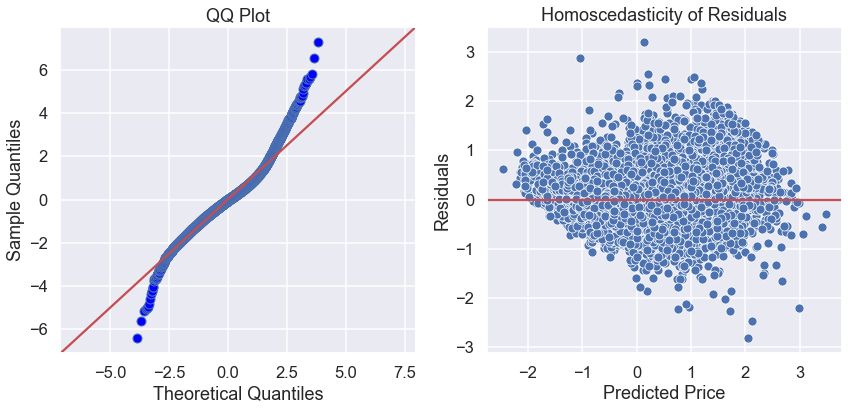

In [47]:
# Run regression model on scaled data
model_scaled, fig_scaled, ax_scaled = model_combined(df_scaled)

## Selecting Variables to Recommend

Now that we have a scaled model, we can pick out the variables with the highest coefficients. This means that we are selecting variables which have the largest impact on the variability of the value of a house.

In [48]:
# Create dataframe of coefficients sorted by highest absolute value
coeffs = model_scaled.params.sort_values().to_frame('coeffs')
coeffs['abs'] = coeffs['coeffs'].abs()
coeffs.sort_values('abs', ascending=False, inplace=True)
coeffs.reset_index(inplace=True)
coeffs[~coeffs['index'].str.startswith('zipcode')]

,index,coeffs,abs
33,Intercept,-1.004551,1.004551
53,sqft_above,0.397017,0.397017
62,sqft_basement,0.170033,0.170033
64,grade,0.162327,0.162327
68,sqft_living15,0.090830,0.090830
70,floors,-0.078977,0.078977
72,waterfront,0.063982,0.063982
74,sqft_lot,0.051372,0.051372
77,bathrooms,0.024169,0.024169
78,bedrooms,-0.011559,0.011559


We can see that aside from the intercept, our coefficients for 'sqft_above', 'sqft_basement', and 'grade' have the most impact on price. Therefore, we will select those variables to interpret and make recommendations to our stakeholder on.

In [49]:
model_unscaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     869.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:29:33   Log-Likelihood:            -2.0856e+05
No. Observations:               16358   AIC:                         4.173e+05
Df Residuals:                   16279   BIC:                         4.179e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.73e+05   8978.380    -30.405      0.000   -2.91e+05   -2.55e+05
bedrooms      -2849.0091   1115.274     -2.555      0.011   -5035.068    -662.950
bathrooms      6955.4124   1611.577      4.316      0.000    3796.545    1.01e+04
sqft_lot          2.8718      0.276     10.409      0.000       2.331       3.413
floors        -2.748e+04   1951.119    -14.082      0.000   -3.13e+04   -2.37e+04
waterfront     3.385e+05   1.87e+04     18.106      0.000    3.02e+05    3.75e+05
grade          3.476e+04   1149.100     30.250      0.000    3.25e+04     3.7e+04
sqft_above      130.3278      2.348     55.500      0.000     125.725     134.931
sqft_basement    90.9779      2.638     34.486      0.000      85.807      96.149
sqft_living15    34.8325      2.107     16.528      0.000      30.702      38.963
zipcode_98002  3.111e+04   7975.317      3.901      0.000    1.55e+04    4.67e+04
zipcode_98003  6760.4627   7310.504      0.925      0.355   -7568.927    2.11e+04
zipcode_98004  5.316e+05   9106.136     58.382      0.000    5.14e+05    5.49e+05
zipcode_98005  3.368e+05   9855.624     34.175      0.000    3.17e+05    3.56e+05
zipcode_98006  2.802e+05   7147.222     39.199      0.000    2.66e+05    2.94e+05
zipcode_98007  2.628e+05   9275.845     28.334      0.000    2.45e+05    2.81e+05
zipcode_98008  2.541e+05   7420.469     34.249      0.000     2.4e+05    2.69e+05
zipcode_98010  9.676e+04   1.36e+04      7.131      0.000    7.02e+04    1.23e+05
zipcode_98011   1.45e+05   8316.130     17.434      0.000    1.29e+05    1.61e+05
zipcode_98014   1.08e+05   1.39e+04      7.790      0.000    8.08e+04    1.35e+05
zipcode_98019  8.778e+04   8780.990      9.997      0.000    7.06e+04    1.05e+05
zipcode_98022  2.768e+04   8721.026      3.174      0.002    1.06e+04    4.48e+04
zipcode_98023 -1.125e+04   6426.804     -1.751      0.080   -2.39e+04    1342.806
zipcode_98024  1.443e+05   1.78e+04      8.107      0.000    1.09e+05    1.79e+05
zipcode_98027  2.366e+05   7721.041     30.640      0.000    2.21e+05    2.52e+05
zipcode_98028  1.339e+05   7433.627     18.012      0.000    1.19e+05    1.48e+05
zipcode_98029  2.397e+05   7261.295     33.009      0.000    2.25e+05    2.54e+05
zipcode_98030  6138.2120   7420.942      0.827      0.408   -8407.648    2.07e+04
zipcode_98031  1.904e+04   7352.505      2.590      0.010    4630.856    3.35e+04
zipcode_98032  1.343e+04   9420.742      1.426      0.154   -5032.423    3.19e+04
zipcode_98033  3.259e+05   6946.511     46.914      0.000    3.12e+05     3.4e+05
zipcode_98034  1.924e+05   6329.075     30.403      0.000     1.8e+05    2.05e+05
zipcode_98038  3.808e+04   6374.554      5.974      0.000    2.56e+04    5.06e+04
zipcode_98039  6.533e+05   3.45e+04     18.938      0.000    5.86e+05    7.21e+05
zipcode_98040  4.401e+05   9275.468     47.452   

# CONCLUSIONS & RECOMMENDATIONS

### Key Takeaways

Our final model has an R2 value of 0.806, indicating that with the included variables, the model is capable of explaining 80.6% of the variability in a property's price.

As we can see in our three plots below, there does seem to be a strong linear relationship between price and our three selected variables: living space above ground, living space below ground and grade.

According to our model, for each foot of living space above ground that is increased, we see an increase in property value of approximately \\$130.33. For each foot of living space below ground that is increased, we see an increase in property value of approximately \\$90.98. Lastly, when the property grade is increased by 1 point, we see an increase in property value of approximately \\$34,760.

An idea for future analysis would be to explore what costs would be involved in making these renovations, and to determine whether these recommendations would be cost-effective.

In [50]:
# Define function to notate dollar amounts in thousands
def thousands(x, pos):
    """Source: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions"""
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

In [51]:
# Group data by sqft_above and find aggregate mean
df_sqftabove = df_unscaled.groupby('sqft_above').mean()

In [52]:
# Reset index before plotting
df_sqftabove.reset_index(inplace=True)

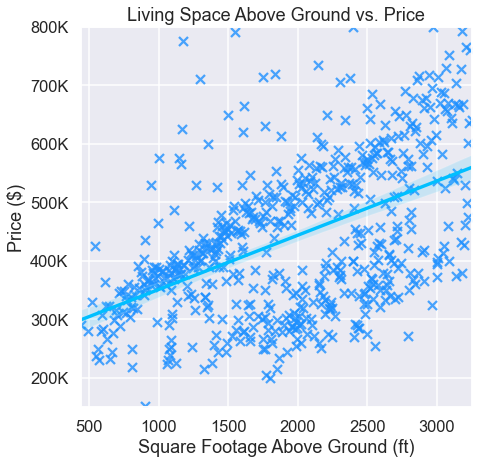

In [53]:
# Plot scatter graph for sqft_above vs price
fig, ax = plt.subplots(figsize=(7,7))

sns.regplot(data=df_sqftabove, x='sqft_above', y='price', marker='x', \
            line_kws={"color": "deepskyblue"}, \
            scatter_kws={"color": "dodgerblue"}, ax=ax)

ax.set_title('Living Space Above Ground vs. Price')
ax.set_xlabel('Square Footage Above Ground (ft)')
ax.set_ylabel('Price ($)')
ax.yaxis.set_major_formatter(formatter);
ax.set_ylim([150000, 800000]);

In [54]:
# Group data points by sqft_basement and calculate aggregate mean
df_sqftbasement = df_unscaled.groupby('sqft_basement').mean()

df_sqftbasement.reset_index(inplace=True)

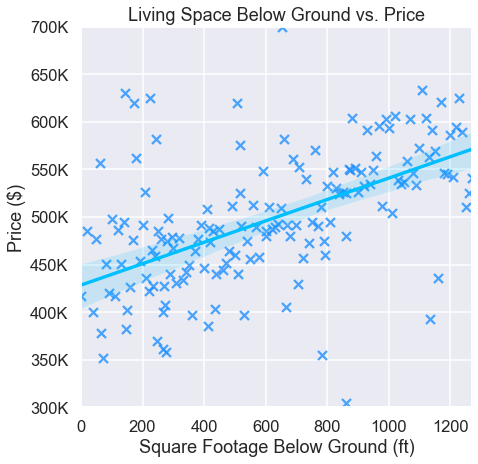

In [55]:
# Plot scatter graph for sqft_below vs price
fig, ax = plt.subplots(figsize=(7,7))

sns.regplot(data=df_sqftbasement, x='sqft_basement', y='price', marker='x', \
            line_kws={"color": "deepskyblue"}, \
            scatter_kws={"color": "dodgerblue"}, ax=ax)

ax.set_title('Living Space Below Ground vs. Price')
ax.set_xlabel('Square Footage Below Ground (ft)')
ax.set_ylabel('Price ($)')
ax.yaxis.set_major_formatter(formatter);
ax.set_ylim([300000, 700000]);

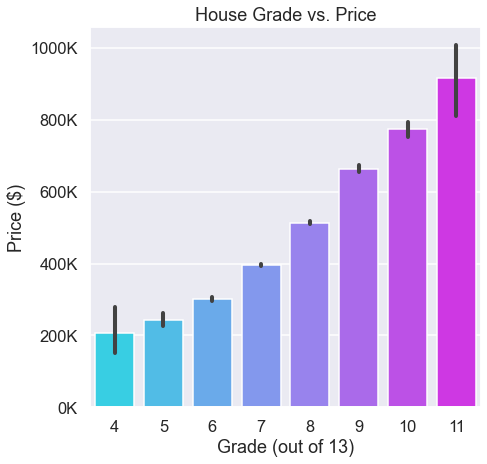

In [56]:
# Plot bar graph for grade vs price
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=df_unscaled, x='grade', y='price', palette='cool', ax=ax)

ax.set_title('House Grade vs. Price')
ax.set_xlabel('Grade (out of 13)')
ax.set_ylabel('Price ($)')
ax.yaxis.set_major_formatter(formatter);